In [1]:
import alpaca_trade_api as alpaca
from datetime import datetime
from local_settings import alpaca_paper
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

ALPACA_API_KEY = alpaca_paper['api_key']
ALPACA_SECRET_KEY = alpaca_paper['api_secret']
END_POINT = alpaca_paper['url']
ALPACA_PAPER = True

api = alpaca.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, END_POINT)

active_assets = api.list_assets(status='active')

case_list = []

In [79]:
folder = '1000day_US/'
avg = []
for id_tp in range(25,26):
    take_profit = (id_tp + 1)/100
    case_list = []
    gain_percentage = []
    for i in range(len(active_assets)):
        exchange = active_assets[i].exchange
        # if exchange != 'NASDAQ' :
        #    continue

        stock_symbol = active_assets[i].symbol
        #print(f'examining "{stock_symbol}"')
        if os.path.exists(folder+stock_symbol+'.json'):
            with open(folder+stock_symbol+'.json', encoding ='utf8') as json_file:
                stock_barset=json.load(json_file)
                stock_barset=stock_barset[stock_symbol]
            for j in range(1,len(stock_barset)-10):
                open_t     = stock_barset[j]['o']
                high_tm1   = stock_barset[j - 1]['h']
                close_t    = stock_barset[j]['c']
                low_t      = stock_barset[j]['l']
                volume_tm1 = stock_barset[j - 1]['v']
                volume_t   = stock_barset[j]['v']

                # condition 1: today's open is higher than 1.02 * yesterday's high
                # condition 2: today's volume is higher than 1.2 * yesterday's volume
                # condition 3: today's low is higher than yesterday's high * 1.02 (overwrite condition 1)
                if low_t > high_tm1 * 1.005 and volume_t > volume_tm1 * 1.05 and volume_tm1 > 10000000:
                    # we found a case
                    date_tmp   = [datetime.fromtimestamp(stock_barset[i]['t']) for i in range(j-15,j+10)]
                    open_tmp   = [stock_barset[i]['o'] for i in range(j-15,j+10)]
                    close_tmp  = [stock_barset[i]['c'] for i in range(j-15,j+10)]
                    high_tmp   = [stock_barset[i]['h'] for i in range(j-15,j+10)]
                    low_tmp    = [stock_barset[i]['l'] for i in range(j-15,j+10)]
                    volume_tmp = [stock_barset[i]['t'] for i in range(j-15,j+10)]

                    case_list.append([stock_symbol, datetime.fromtimestamp(stock_barset[j]['t']),volume_tm1])

                    if(0):
                        fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                                            vertical_spacing=0.03, subplot_titles=('OHLC', 'Volume'), 
                                            row_width=[0.2, 0.7])


                        # draw candle stick
                        # include candlestick with rangeselector
                        fig.add_trace(go.Candlestick(x=date_tmp, 
                                                     open=open_tmp, 
                                                     high=high_tmp, 
                                                     close=close_tmp, 
                                                     low=low_tmp, 
                                                     increasing_line_color= 'red', 
                                                     decreasing_line_color= 'green'), 
                                      row=1,col=1)

                        # include a go.Bar trace for volumes
                        fig.add_trace(go.Bar(x=date_tmp, 
                                             y=volume_tmp),
                                      row=2,col=1)
                        fig.update(layout_xaxis_rangeslider_visible=False)

                        datestr = datetime.fromtimestamp(stock_barset[j]['t']).strftime("%y_%m_%d")
                        fig.write_image("screenshots/" + stock_symbol +"_" + datestr+ ".jpeg")

                    for i in range(11):
                        if (i == 10):
                            loss = ((stock_barset[j+i+1])['c'] - close_t) / close_t
                            gain_percentage.append(loss)

                        if (stock_barset[j+i+1]['l'] <= high_tm1):
                            loss = (high_tm1 - close_t) / close_t
                            gain_percentage.append(loss)
                            break
                        if(stock_barset[j+i+1])['h'] > close_t * (1.0 + take_profit):
                            gain_percentage.append(take_profit)
                            break
                #loss_list.append(maximum_loss_percentage)
    res = 1
    for i in range(len(gain_percentage)):
        res = res*(1+gain_percentage[i])
    avg.append(res**(1/len(gain_percentage)))
    len(avg)

In [83]:
loses = [x for x in gain_percentage if x < 0]
res = 1
for x in loses:
    res = res*(1+x)
res**(1/len(loses))


0.9290833219440564

Text(0, 0.5, 'averaged rate of return')

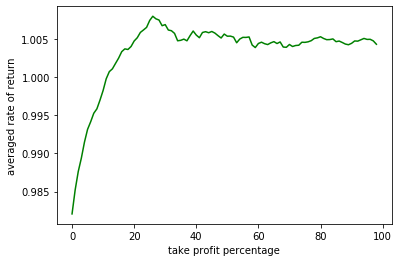

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(avg,color='green')
ax.set_xlabel('take profit percentage')
ax.set_ylabel('averaged rate of return')
ax.set_ylim()

In [82]:
len(loses)/len(gain_percentage)

0.6076614148903305

In [18]:
len(gain_list)

1899

In [19]:
len(loss_list)

1899

In [73]:
len(gain_percentage)

3217

In [110]:
len(case_list)

3710

In [117]:
sorted(case_list, key=lambda x: x[1], reverse=True)

[['ALDX', datetime.datetime(2021, 4, 27, 0, 0), 580816],
 ['ARAV', datetime.datetime(2021, 4, 27, 0, 0), 54998],
 ['BDRY', datetime.datetime(2021, 4, 27, 0, 0), 252921],
 ['CERC', datetime.datetime(2021, 4, 27, 0, 0), 327641],
 ['CROX', datetime.datetime(2021, 4, 27, 0, 0), 1477979],
 ['DMTK', datetime.datetime(2021, 4, 27, 0, 0), 811878],
 ['FCBP', datetime.datetime(2021, 4, 27, 0, 0), 26141],
 ['GMBL', datetime.datetime(2021, 4, 27, 0, 0), 736564],
 ['HBMD', datetime.datetime(2021, 4, 27, 0, 0), 19705],
 ['HSBC', datetime.datetime(2021, 4, 27, 0, 0), 2200301],
 ['HSII', datetime.datetime(2021, 4, 27, 0, 0), 76442],
 ['AAN', datetime.datetime(2021, 4, 27, 0, 0), 230424],
 ['NTWK', datetime.datetime(2021, 4, 27, 0, 0), 6674],
 ['PHM', datetime.datetime(2021, 4, 27, 0, 0), 3237101],
 ['RIBT', datetime.datetime(2021, 4, 27, 0, 0), 245215],
 ['RRR', datetime.datetime(2021, 4, 27, 0, 0), 590483],
 ['SHIP', datetime.datetime(2021, 4, 27, 0, 0), 6448667],
 ['SYNA', datetime.datetime(2021, 4,

In [72]:
time.month

AttributeError: 'str' object has no attribute 'month'

In [5]:
len(case_list)

1